### Objectives

1. Complete a project and add it to your portfolio
2. Use matplotlib and seaborn to create visualizations 
3. Preprocess, explore and analyze data

### Goals

The goal of this project is to investigate whether there is any correlation between the GDP of a country and the life expectancy of its citizens at birth, a few questions I will be looking to answer are
    1. Has life expectancy increased over the timeline, and has this been matched by an increase in GDP
    2. Which country has the highest average GDP, does this country also have the highest average life expectancy
   

In [1]:
# import modules needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Access, read and inspect the data

df = pd.read_csv('all_data.csv')

print(df.describe())

print('\n\n\n')

print(df.head())

print('\n\n\n')

print(df.columns)

print('\n\n\n')

print(df.shape)

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13




  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10




Index

In [67]:
# Check column types
print(df.dtypes)

#unique countries
print(df['Country'].unique())

df.rename(columns={'Life expectancy at birth (years)':'Expectancy'}, inplace=True)
print('\n\n\n')
print(df.head())

Country        object
Year            int64
Expectancy    float64
GDP           float64
dtype: object
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']




  Country  Year  Expectancy           GDP
0   Chile  2000        77.3  7.786093e+10
1   Chile  2001        77.3  7.097992e+10
2   Chile  2002        77.8  6.973681e+10
3   Chile  2003        77.9  7.564346e+10
4   Chile  2004        78.0  9.921039e+10


In [113]:
countries = df.groupby('Country').mean()

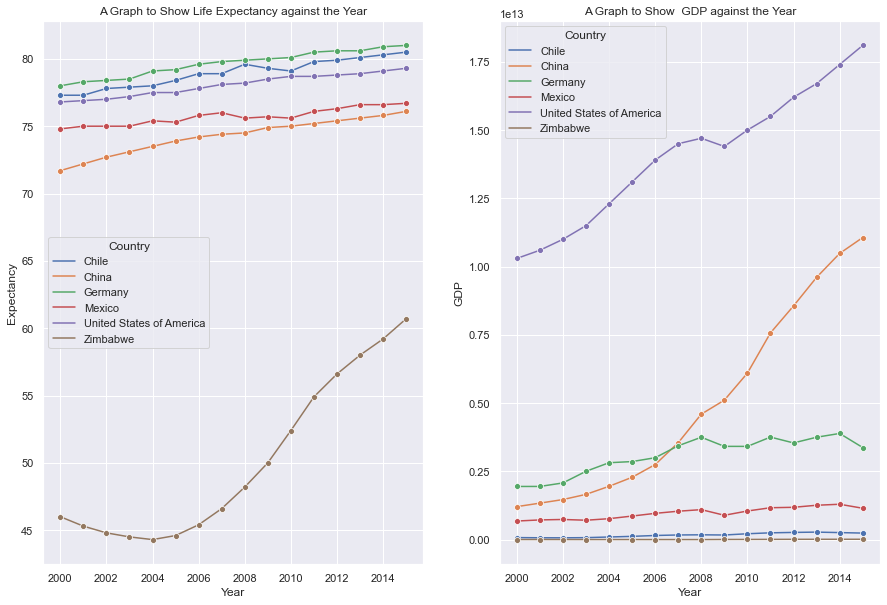

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(15,10), sharex=True)
sns.lineplot(ax=axes[0], data=df, x='Year', y = 'Expectancy', hue='Country', marker='o')
axes[0].set_title('A Graph to Show Life Expectancy against the Year')
axes[1].set_title('A Graph to Show  GDP against the Year')
sns.lineplot(ax=axes[1], data=df, x='Year', y='GDP', hue='Country', marker='o')
plt.show()


If you compare these two graphs,  it would appear that there may be some correlation between a countries GDP and a countries life expectancy at birth, i figure this because both trends are both generally going upwards, one point negating this would be how the life expectancy of zimbabwe goes up so sharply, with the GDP baerly moving off the ground, especially in compaison to most of the othe GDP's

### Scattered GDP vs Life Expectancy

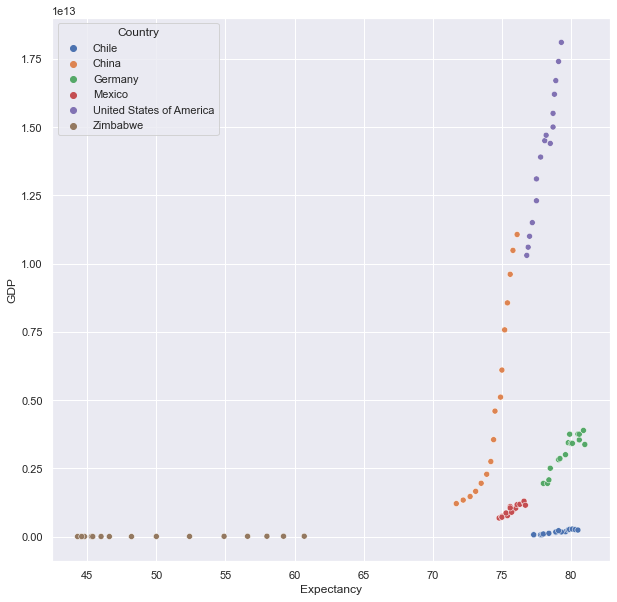

In [147]:
fig, ax = plt.subplots(1, figsize=(10,10))
sns.scatterplot(data=df, x='Expectancy', y='GDP', hue='Country')
plt.show()

Looking at this next graph, i would have to say there is definietly a correlation between GDP and life expectancy, each countries life expectancy goes up as the countries GDP does, however the rate at which life expectnacy goes up is much slower.

In [121]:
averages = df.groupby('Country').mean().reset_index()
print(averages)

                    Country    Year  Expectancy           GDP
0                     Chile  2007.5    78.94375  1.697888e+11
1                     China  2007.5    74.26250  4.957714e+12
2                   Germany  2007.5    79.65625  3.094776e+12
3                    Mexico  2007.5    75.71875  9.766506e+11
4  United States of America  2007.5    78.06250  1.407500e+13
5                  Zimbabwe  2007.5    50.09375  9.062580e+09


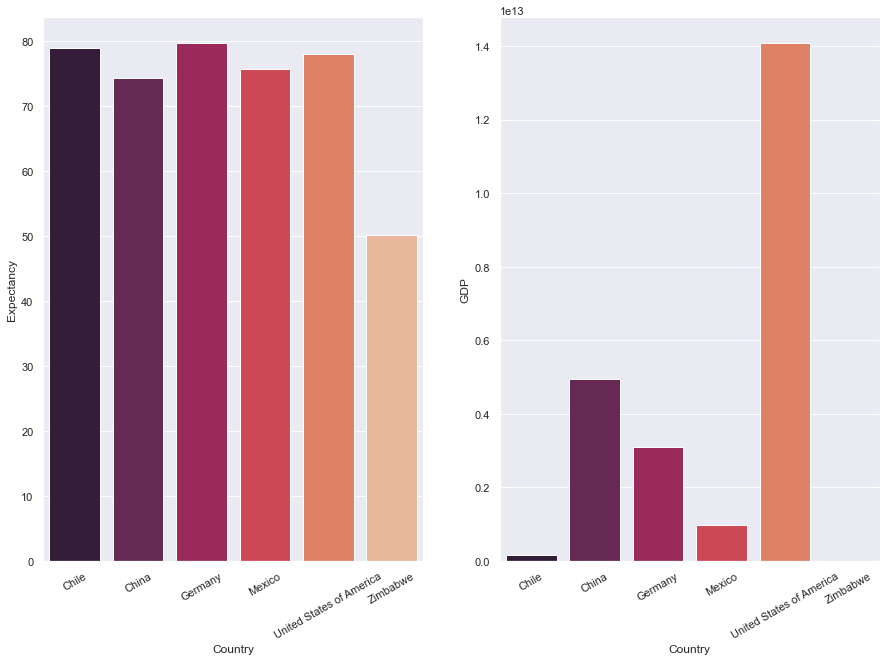

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data=averages, x='Country', y='Expectancy', ax=axes[0], palette='rocket')
sns.barplot(data=averages, x='Country', y='GDP',ax=axes[1], palette = 'rocket')
axes[0].set_xticklabels(labels=averages['Country'], rotation=30)
axes[1].set_xticklabels(labels=averages['Country'], rotation=30)
plt.show()

These charts would seem to state that there isn't much of a correlation between life expectancy and GDP, as if that was the case exactly the United States of America would have a much higher life expectacy than the other countries, however, the data does not bring in any other factors, for example guns being legal in American and not in Germany could bring the life expectancy up or down, more than likely in htis case it is bringing it down

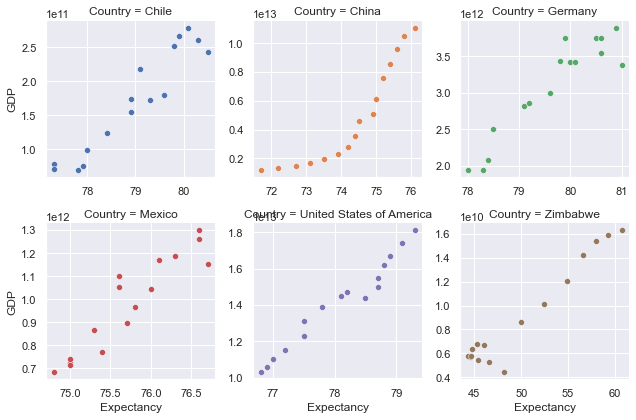

In [151]:
g = sns.FacetGrid(data=df, col='Country', col_wrap=3, hue='Country', sharey=False, sharex=False)
g.map_dataframe(sns.scatterplot, x='Expectancy', y='GDP')
plt.show()

When looking at each countries GDP plotted against the life expectancy, I would have to conclude that life expectancy does go up as a countries GDP grows.